<a href="https://colab.research.google.com/github/Inkizhekov/My-todo-do/blob/main/%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_hiererchical_clustering_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_DBSCAN_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%A7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt


In [99]:
# Задаем массив

X = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1],
              [2, 1],
              [2, 2],
              [3, 2],
              [6, 6],
              [7, 6],
              [8, 6],
              [6, 7],
              [7, 7],
              [8, 7],
              [9, 7],
              [7, 8],
              [8, 8],
              [9, 8],
              [8, 9],
              [9, 9],])

In [100]:
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [2, 2],
       [3, 2],
       [6, 6],
       [7, 6],
       [8, 6],
       [6, 7],
       [7, 7],
       [8, 7],
       [9, 7],
       [7, 8],
       [8, 8],
       [9, 8],
       [8, 9],
       [9, 9]])

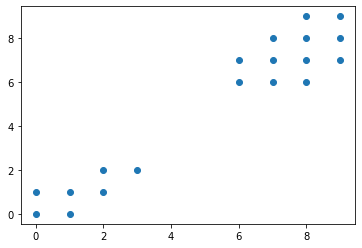

In [101]:
plt.scatter(X[:,0], X[:,1])

In [102]:
from sklearn.cluster import DBSCAN

In [103]:
dbcluster = DBSCAN(eps=4, min_samples=3).fit(X)

In [104]:
dblabels = dbcluster.labels_

In [105]:
dblabels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

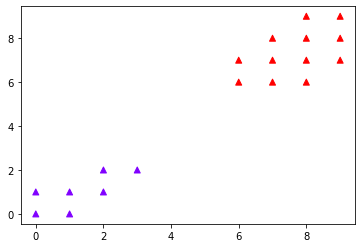

In [106]:
plt.scatter(X[:,0], X[:,1], c=dblabels, marker= '^', cmap='rainbow')

In [107]:
from sklearn import datasets

In [108]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

In [109]:
noisy_circles

(array([[-0.35289197, -0.25686786],
        [ 0.17143301,  0.98905053],
        [-0.04614222, -0.45712041],
        ...,
        [-0.45402741,  0.22431031],
        [-0.93348042, -0.13905438],
        [ 0.36674881, -0.39035269]]), array([1, 0, 1, ..., 1, 0, 1]))

In [110]:
n_cir = noisy_circles[0]

from sklearn.preprocessing import StandardScaler

n_cir = StandardScaler().fit_transform(n_cir)

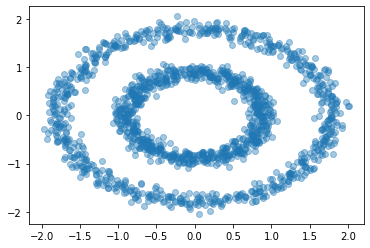

In [111]:
plt.scatter(n_cir[:, 0], n_cir[:,1], alpha = 0.4)


In [112]:
from sklearn.cluster import KMeans

In [113]:
K_means = KMeans(n_clusters = 2).fit(n_cir)

In [114]:
print (K_means.labels_)

[0 1 0 ... 1 1 0]


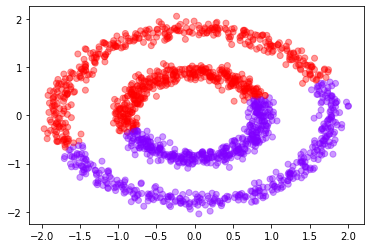

In [115]:
plt.scatter(n_cir[:, 0], n_cir[:,1], c = K_means.labels_, marker = 'o', cmap= 'rainbow', alpha = 0.4)

<function matplotlib.pyplot.show(*args, **kw)>

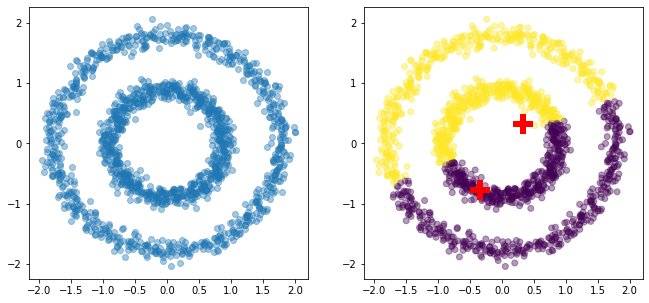

In [116]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_cir[:,0], n_cir[:,1], alpha=.4)
axes[1].scatter(n_cir[:,0], n_cir[:,1], c = K_means.labels_, alpha=.4)
axes[1].scatter(K_means.cluster_centers_[:, 0], K_means.cluster_centers_[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

In [117]:
dbclusters_cir = DBSCAN(eps=0.3, min_samples=5).fit(n_cir)

In [118]:
dblables_cir = dbclusters_cir.labels_
dblables_cir

array([0, 1, 0, ..., 0, 1, 0])

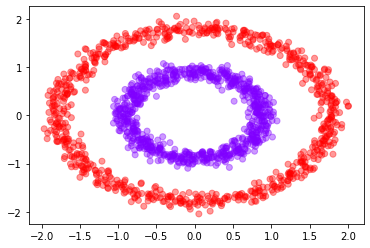

In [119]:
plt.scatter(n_cir[:, 0], n_cir[:,1], c = dblables_cir, marker = 'o', cmap='rainbow', alpha = 0.4)

<function matplotlib.pyplot.show(*args, **kw)>

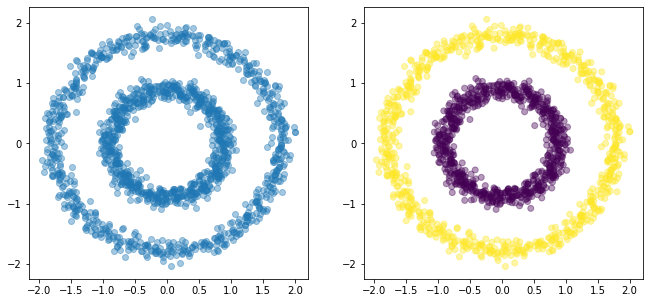

In [120]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_cir[:,0], n_cir[:,1], alpha=.4)
axes[1].scatter(n_cir[:,0], n_cir[:,1], c = dblables_cir, alpha=.4)
#axes[1].scatter(K_means.cluster_centers_[:, 0], K_means.cluster_centers_[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

In [121]:
pip install fuzzy-c-means


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
from fcmeans import FCM

In [123]:
fcm_cir = FCM(n_clusters=2)
fcm_cir.fit(n_cir)

In [124]:
fcm_cir_centres = fcm_cir.centers
fcm_cir_labels = fcm_cir.predict(n_cir)

In [125]:
fcm_cir_centres

array([[-0.57045093, -0.56086986],
       [ 0.56753103,  0.55847068]])

<function matplotlib.pyplot.show(*args, **kw)>

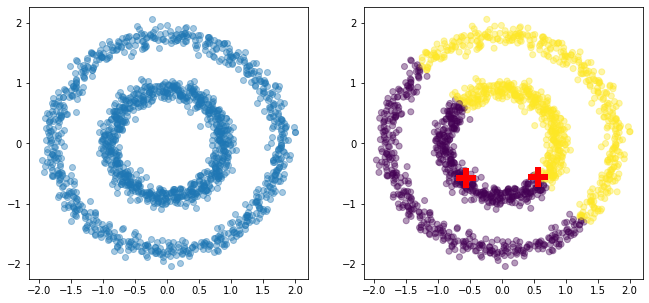

In [126]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_cir[:,0], n_cir[:,1], alpha=.4)
axes[1].scatter(n_cir[:,0], n_cir[:,1], c = fcm_cir_labels, alpha=.4)
axes[1].scatter(fcm_cir_centres[:, 0], fcm_cir_centres[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

In [127]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

In [128]:
noisy_moons

(array([[ 0.65552832,  0.77924828],
        [ 0.73237425,  0.65137283],
        [ 0.77157717,  0.59404431],
        ...,
        [ 0.67393473, -0.37956479],
        [ 1.22934691, -0.38017587],
        [ 0.37578351,  1.0047634 ]]), array([0, 0, 0, ..., 1, 1, 0]))

In [129]:
n_moon = noisy_moons[0]

from sklearn.preprocessing import StandardScaler
n_moon = StandardScaler().fit_transform(n_moon)

In [130]:
n_moon

array([[ 0.17936125,  1.07063163],
       [ 0.26788517,  0.811983  ],
       [ 0.31304562,  0.69602686],
       ...,
       [ 0.20056481, -1.27325388],
       [ 0.84038093, -1.27448989],
       [-0.14289534,  1.52677218]])

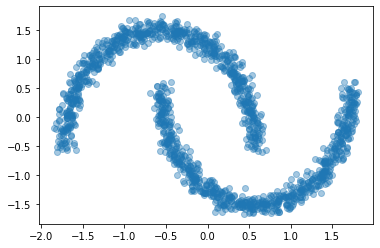

In [131]:
plt.scatter(n_moon[:, 0], n_moon[:, 1], alpha = 0.4)

In [132]:
dbcluster_moon1 = DBSCAN(eps=0.3).fit(n_moon)
dblabels_moon1 = dbcluster_moon1.labels_
dblabels_moon1

array([0, 0, 0, ..., 1, 1, 0])

<function matplotlib.pyplot.show(*args, **kw)>

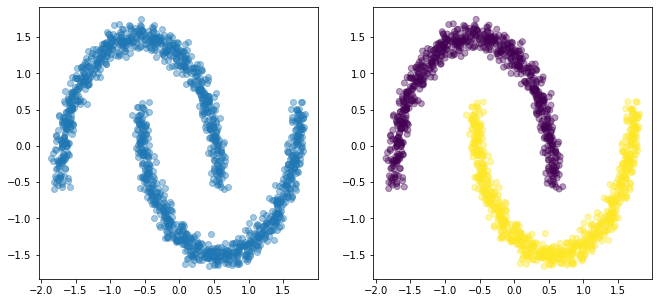

In [133]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_moon[:,0], n_moon[:,1], alpha=.4)
axes[1].scatter(n_moon[:,0], n_moon[:,1], c = dblabels_moon1, alpha=.4)
#axes[1].scatter(fcm_cir_centres[:, 0], fcm_cir_centres[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

In [134]:
K_means1 = KMeans(n_clusters = 2).fit(n_moon)

<function matplotlib.pyplot.show(*args, **kw)>

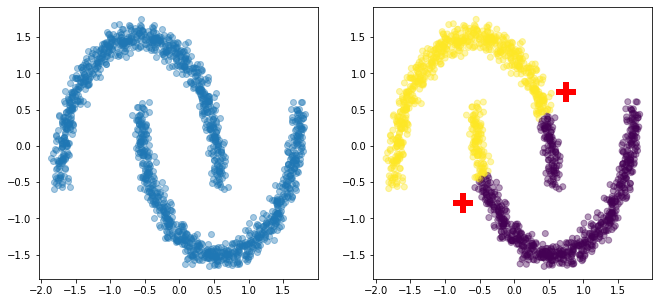

In [136]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_moon[:,0], n_moon[:,1], alpha=.4)
axes[1].scatter(n_moon[:,0], n_moon[:,1], c = K_means1.labels_, alpha=.4)
axes[1].scatter(K_means1.cluster_centers_[:, 0], K_means1.cluster_centers_[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

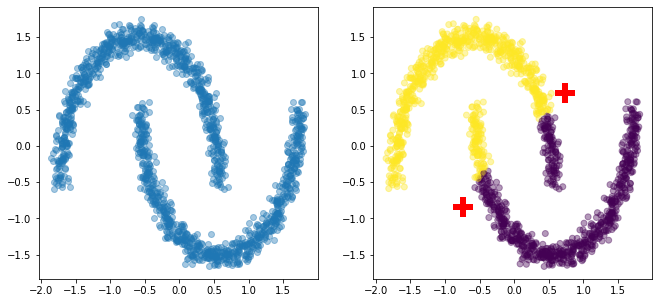

In [137]:
fcm_moon = FCM(n_clusters=2)
fcm_moon.fit(n_moon)
fcm_moon_centres = fcm_moon.centers
fcm_moon_labels = fcm_moon.predict(n_moon)
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_moon[:,0], n_moon[:,1], alpha=.4)
axes[1].scatter(n_moon[:,0], n_moon[:,1], c = fcm_moon_labels, alpha=.4)
axes[1].scatter(fcm_moon_centres[:, 0], fcm_moon_centres[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

In [139]:
np.random.seed(0)
random_state =3
blobs = datasets.make_blobs(n_samples=n_samples, cluster_std = [0.5, 1.0, 1.5], random_state=random_state)

b1 = blobs[0]
from sklearn.preprocessing import StandardScaler
b1 = StandardScaler().fit_transform(b1)

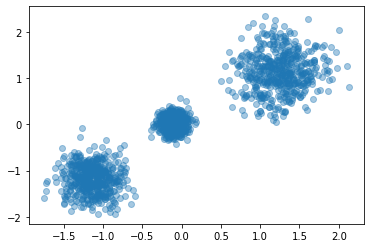

In [140]:
plt.scatter(b1[:, 0], b1[:,1], alpha= 0.4)

In [142]:
dbcluster_b1 = DBSCAN(eps=0.2).fit(b1)
dblabels_b1 = dbcluster_b1.labels_
dblabels_b1

array([-1,  0,  1, ...,  1,  1,  1])

<function matplotlib.pyplot.show(*args, **kw)>

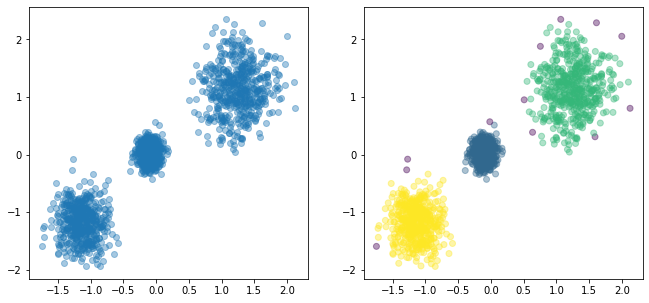

In [143]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(b1[:,0], b1[:,1], alpha=.4)
axes[1].scatter(b1[:,0], b1[:,1], c = dblabels_b1, alpha=.4)
#axes[1].scatter(fcm_moon_centres[:, 0], fcm_moon_centres[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

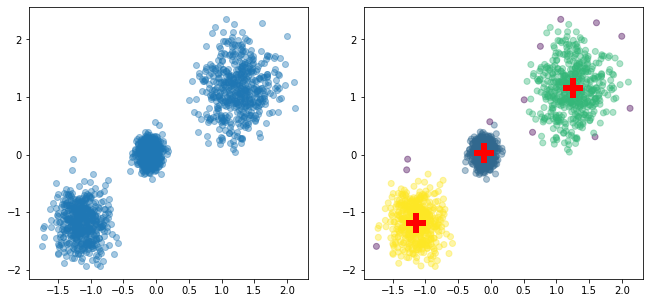

In [147]:
K_means2 = KMeans(n_clusters = 3).fit(b1)
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(b1[:,0], b1[:,1], alpha=.4)
axes[1].scatter(b1[:,0], b1[:,1], c = dblabels_b1, alpha=.4)
axes[1].scatter(K_means2.cluster_centers_[:, 0], K_means2.cluster_centers_[:, 1], marker = '+', color = 'red', linewidth = 20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

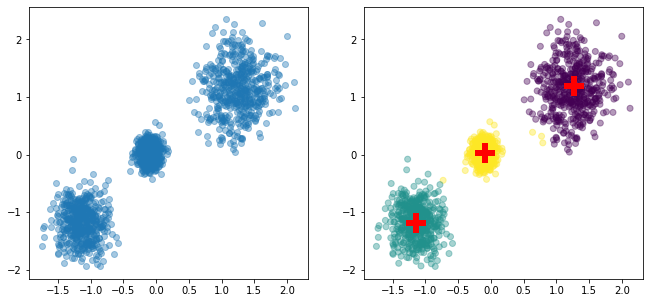

In [150]:
fcm_b1 = FCM(n_clusters=3)
fcm_b1.fit(b1)
fcm_b1_centres = fcm_b1.centers
fcm_b1_labels = fcm_b1.predict(b1)
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(b1[:,0], b1[:,1], alpha=.4)
axes[1].scatter(b1[:,0], b1[:,1], c = fcm_b1_labels, alpha=.4)
axes[1].scatter(fcm_b1_centres[:, 0], fcm_b1_centres[:, 1], marker = '+', color = 'red', linewidth = 20)
plt.show